<a href="https://colab.research.google.com/github/mahilohiya/ml-projects/blob/main/propertyprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('propertyprediction.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

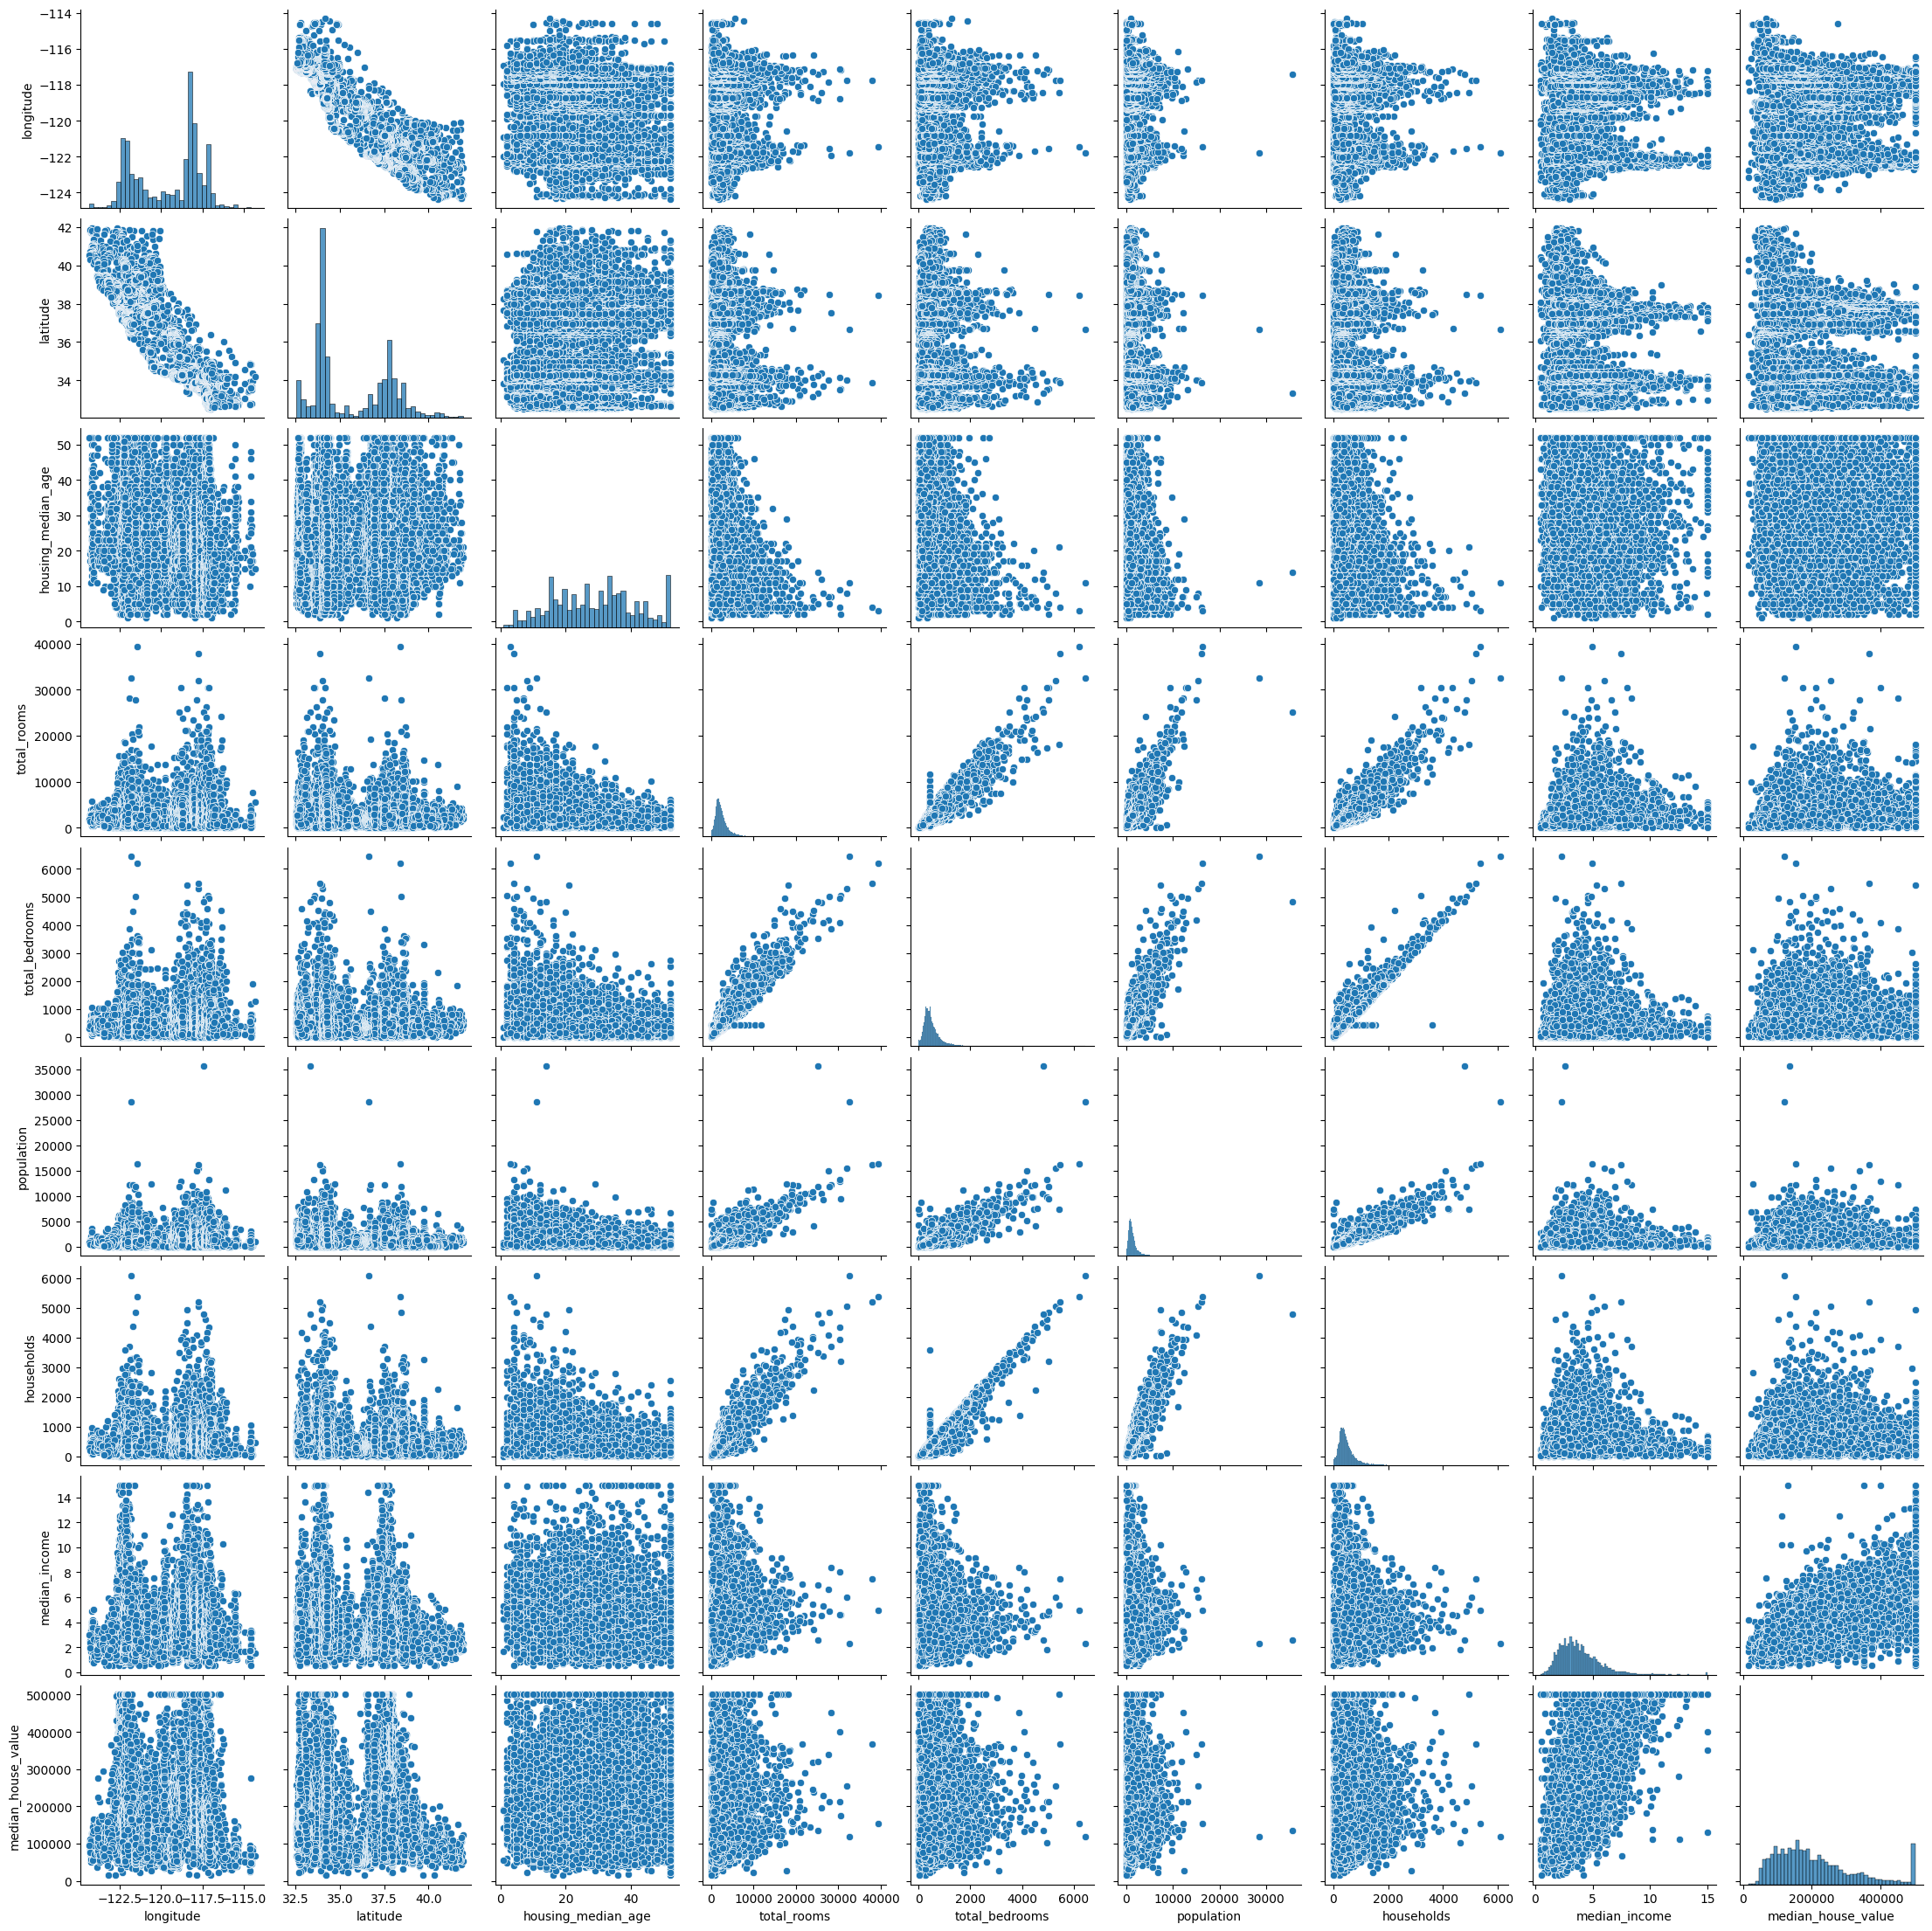

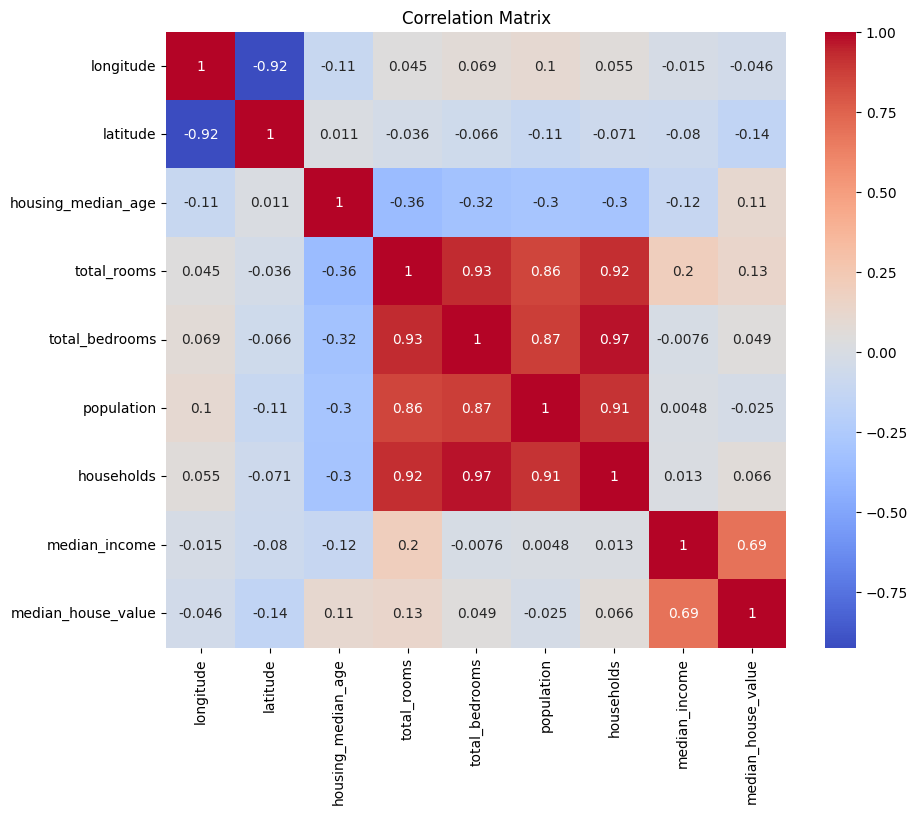

In [7]:
#Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

cm = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


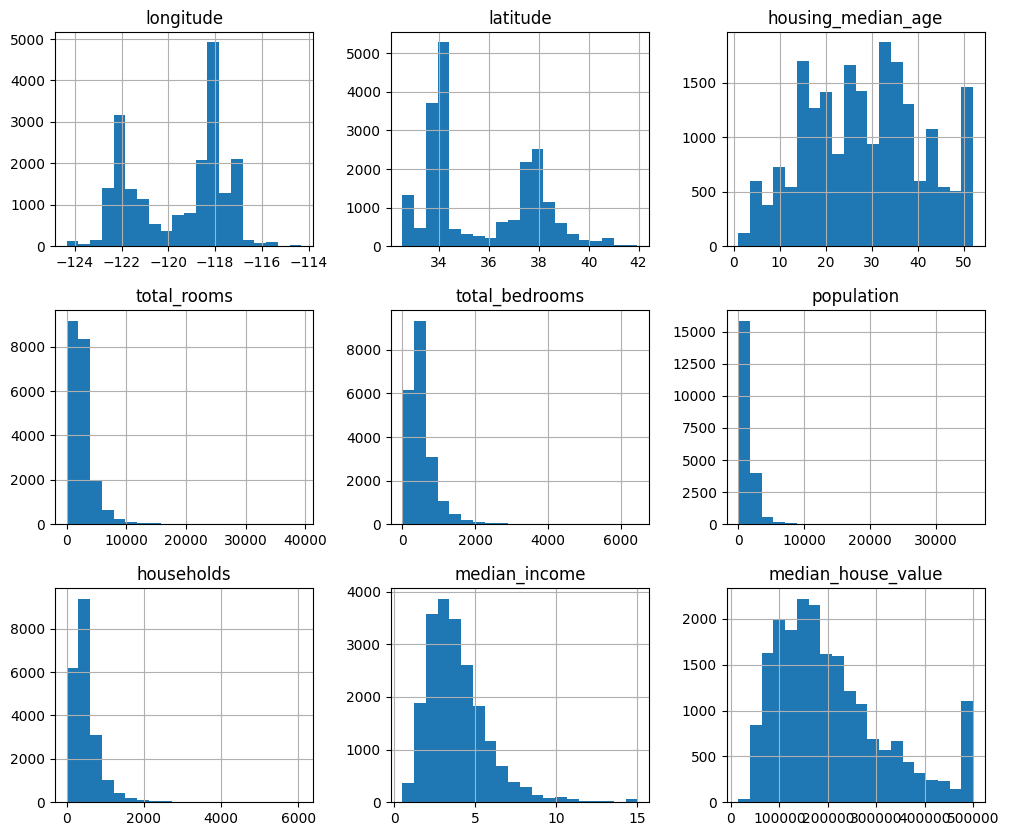

In [8]:
df.hist(figsize=(12,10), bins=20)
plt.show()

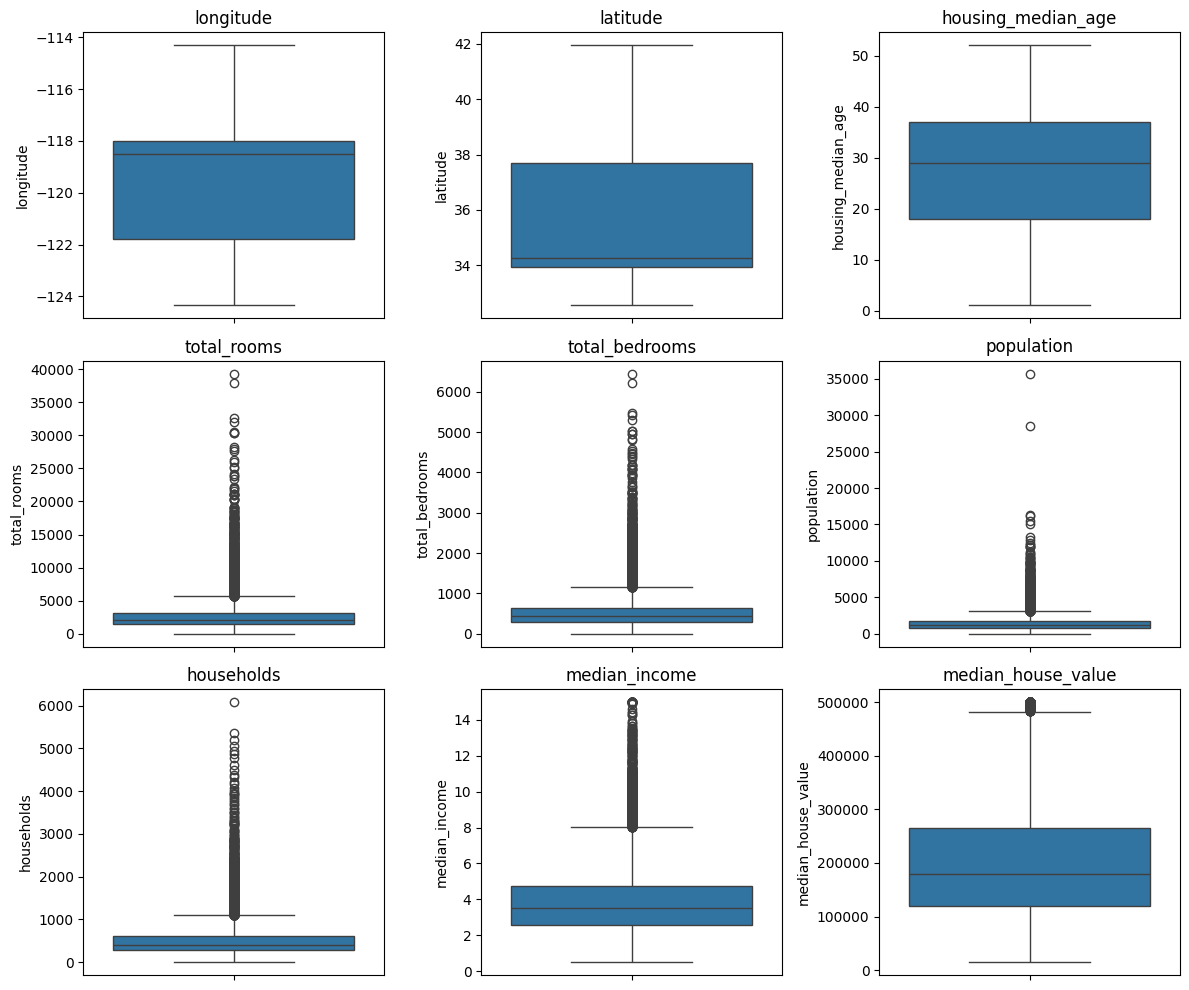

In [9]:
plt.figure(figsize=(12,10))
# Select the first 9 columns for plotting to fit in a 3x3 subplot grid
for i, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

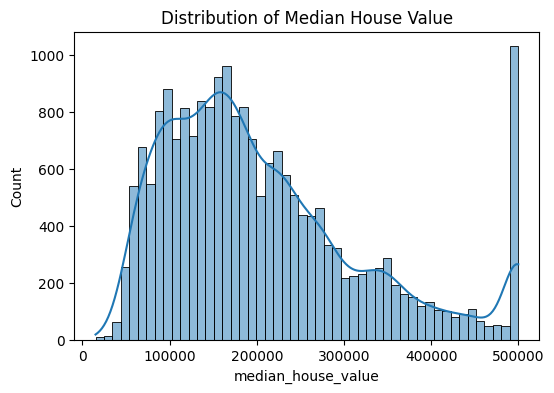

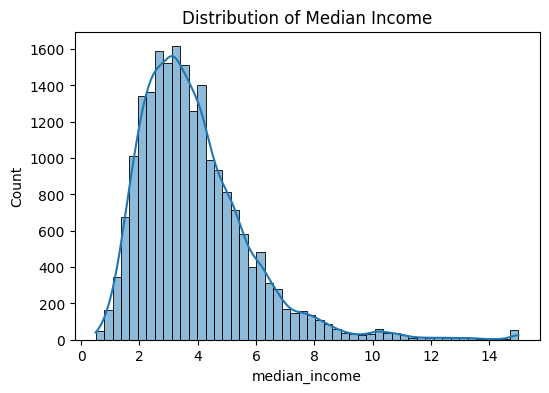

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['median_income'], bins=50, kde=True)
plt.title("Distribution of Median Income")
plt.show()

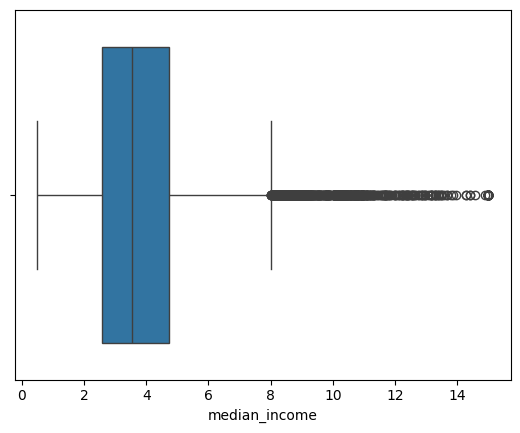

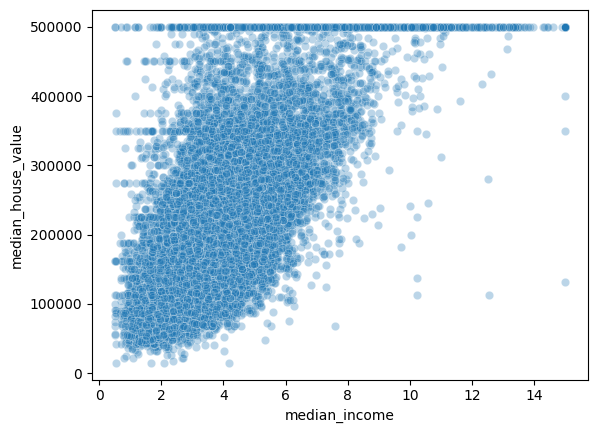

In [11]:
sns.boxplot(x=df['median_income'])
plt.show()

sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.3)
plt.show()


In [12]:
df['median_house_value'].max()
df[df['median_house_value'] >= 500000].shape


(992, 10)

In [13]:
#data preprocessing
x= df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y= df[['median_house_value']]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 5059928371.1653385
R-squared: 0.613866475643519
Root Mean Squared Error: 71133.17349286012


In [15]:
#Multi-Linear regression
x_multi = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y_multi = df[['median_house_value']]

x_train_multi, x_test_multi, y_train_multi, y_test_multi =train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(x_train_multi, y_train_multi)

y_pred_multi = multi_model.predict(x_test_multi)

mse = mean_squared_error(y_test_multi, y_pred_multi)
r2 = r2_score(y_test_multi, y_pred_multi)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5059928371.1653385
R-squared: 0.613866475643519


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression # Added import

model = LinearRegression()


scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

print("Cross-validation RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

Cross-validation RMSE scores: [66828.94703373 74692.23213957 77384.06256992 73219.57164315
 67174.19871851]
Average RMSE: 71859.80242097554
Standard deviation of RMSE: 4186.967127300595
